In [1]:
#!cp /content/drive/MyDrive/Data/custom_coco.zip custom_coco.zip

In [ ]:
#!unzip custom_coco.zip

In [1]:
!wget https://data.mendeley.com/public-files/datasets/fpctx3svzd/files/a1b72a50-c2b0-4279-9541-37825a162ec5/file_downloaded

--2021-04-30 08:29:17--  https://data.mendeley.com/public-files/datasets/fpctx3svzd/files/a1b72a50-c2b0-4279-9541-37825a162ec5/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/832ea908-43bd-44bc-8350-36c724a2ac1c [following]
--2021-04-30 08:29:17--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/832ea908-43bd-44bc-8350-36c724a2ac1c
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.20.107
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.20.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3096743576 (2.9G) [applicat

In [ ]:
!unzip /content/file_downloaded

In [5]:
main_folder = '/content/MYNursingHome'# '/content/MYNursingHome/'
import os

In [6]:
directory=os.listdir(main_folder)

In [7]:
correct_dirs = ['sofa','refrigerator','fan','bed','television','toilet_seat','table',
                'bench','chair','rack','cabinet','wardrobe','sink']

In [9]:
import shutil
for i in directory:
  if i not in correct_dirs:
    shutil.rmtree(main_folder+'/'+i)

In [10]:
train_dir = '/content/MYNursingHome'#"/content/content/coco_images"

In [ ]:
# to be remove 
# /content/content/coco_images/clock
# /content/content/coco_images/"potted plant"
# /content/content/coco_images/toaster
# /content/content/coco_images/vase

In [36]:
#!rm -rf /content/content/coco_images/"potted plant"

In [86]:
from keras.preprocessing.image import ImageDataGenerator

In [87]:
train_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    validation_split=0.10)
 # set validation split
test_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    validation_split=0.5)

train_generator = train_datagen.flow_from_directory(
    train_dir,shuffle=True,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir,shuffle=True, # same directory as training data
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation') 

Found 16380 images belonging to 13 classes.
Found 3120 images belonging to 13 classes.


In [88]:
inv_map = {v: k for k, v in validation_generator.class_indices.items()}

In [ ]:
x= train_generator.next()
#print(x[0].shape)
for j,i in enumerate(x[0]):
    plt.imshow(i)
    plt.title(inv_map[x[1][j]])
    plt.show()
    

In [ ]:
# from tensorflow.keras.applications import imagenet_utils
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.preprocessing.image import load_img
# import numpy as np
# import argparse
# import cv2

In [ ]:
#from tensorflow.keras.applications import ResNet50

In [ ]:
# for layer in baseModel.layers:
#     layer.trainable = False

In [90]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense,BatchNormalization
from keras.layers import Flatten,Dropout
# load model without classifier layers vgg16
#model = VGG16(include_top=False, input_shape=(256, 256, 3),pooling ='max')
# load model resnet50
model = ResNet50(include_top=False, input_shape=(256, 256, 3),pooling='max')

# load model
#model = InceptionV3(include_top=False, input_shape=(256, 256, 3),weights='imagenet',pooling='max')
for layer in model.layers:
     layer.trainable = False
# for layer in model.layers[:-1]:
#     if isinstance(layer, BatchNormalization): #need to reatrain batchnorm
#         layer.trainable = True
#     else:
#         layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
flat1b = BatchNormalization()(flat1)
#d0 = Dropout(rate=0.5)(flat1b) #Dense(4048, activation='relu')(flat1)
class1 = Dense(1024, activation='relu')(flat1b)
class1b = BatchNormalization()(class1)
d1 = Dropout(rate=0.5)(class1b)

class_1 = Dense( 512, activation='relu')(d1)
class_1b = BatchNormalization()(class_1)
d_1 = Dropout(rate=0.5)(class_1b)

#class2 = Dense(512, activation='relu')(class1)
class2 = Dense(256, activation='relu')(d_1)
class2b = BatchNormalization()(class2)
d2 = Dropout(rate=0.5)(class2b)

class3 = Dense(128, activation='relu')(d2)
class3b = BatchNormalization()(class3)

class4= Dense(64, activation='relu')(class3b)
class4b = BatchNormalization()(class4)

output = Dense(13,activation='softmax')(class4b)
# define new model
model1 = Model(inputs=model.inputs, outputs=output)
# summarize
model1.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________

In [ ]:
from tensorflow import keras
# for layer in resnet.layers:
#     layer.trainable = False
opt = keras.optimizers.SGD( learning_rate=0.01)

In [91]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
#model.summary()

In [92]:
history = model1.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
        )

Epoch 1/10
512/512 [==============================] - 210s 402ms/step - loss: 2.4019 - accuracy: 0.2260 - val_loss: 1.6273 - val_accuracy: 0.4452
Epoch 2/10
512/512 [==============================] - 202s 394ms/step - loss: 1.7340 - accuracy: 0.4005 - val_loss: 1.4050 - val_accuracy: 0.5272
Epoch 3/10
512/512 [==============================] - 200s 391ms/step - loss: 1.5402 - accuracy: 0.4749 - val_loss: 1.2585 - val_accuracy: 0.6006
Epoch 4/10
512/512 [==============================] - 203s 396ms/step - loss: 1.4057 - accuracy: 0.5267 - val_loss: 1.1708 - val_accuracy: 0.6170
Epoch 5/10
512/512 [==============================] - 203s 395ms/step - loss: 1.3145 - accuracy: 0.5672 - val_loss: 1.1170 - val_accuracy: 0.6538
Epoch 6/10
512/512 [==============================] - 204s 398ms/step - loss: 1.2120 - accuracy: 0.5935 - val_loss: 1.0671 - val_accuracy: 0.6545
Epoch 7/10
512/512 [==============================] - 202s 395ms/step - loss: 1.1649 - accuracy: 0.6186 - val_loss: 0.9755 -

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


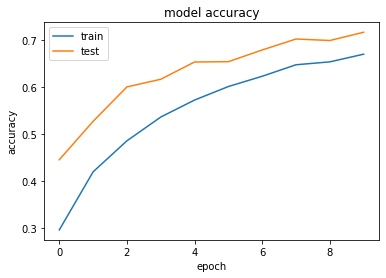

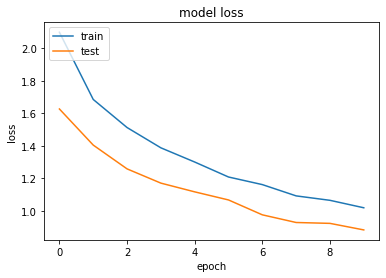

In [93]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
X, y = validation_generator.next()

In [95]:
y_pred_ohe = model1.predict(X)

In [63]:
y

array([11., 11.,  4.,  1.,  3.,  7., 12.,  1.,  9.,  7., 11.,  9., 10.,
        2., 12.,  3.,  6., 10.,  5., 10.,  1.,  3.,  6.,  0.,  1.,  0.,
        4., 12.,  2.,  5.,  7.,  3.], dtype=float32)

In [96]:
np.argmax(y_pred_ohe[1])

4

In [97]:
import numpy as np

In [98]:
y_pred_labels = np.argmax(y_pred_ohe, axis=1)

In [99]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   

In [100]:
import sklearn.metrics as metrics

In [39]:
print(y_pred_labels[:50])

[ 9 11  7 10  7 12  9  2  0  4 11  5  5 10  9  1  7 10  4  5  6  5  7 11
 12  2  0 10  6  4  2  0 10  8  3  3  5  8 12 12  1  0  2  8  2  3  1  8
  2  3]


In [101]:
metrics.accuracy_score(y,y_pred_labels)

0.78125

In [102]:
for rem in range(0,12) :
  if rem not in y_pred_labels:
    print(rem)
    print(inv_map[rem])

3
chair
11
toilet_seat


In [103]:
confusion_matrix = metrics.confusion_matrix(y_true=y, y_pred=y_pred_labels)

In [108]:
class_labels.remove(inv_map[3])

In [109]:
print(metrics.classification_report( y , y_pred_labels,target_names=class_labels))

              precision    recall  f1-score   support

         bed       0.50      1.00      0.67         2
       bench       1.00      0.33      0.50         3
     cabinet       0.33      0.50      0.40         2
         fan       0.83      1.00      0.91         5
        rack       1.00      0.67      0.80         3
refrigerator       1.00      0.83      0.91         6
        sink       1.00      1.00      1.00         3
        sofa       1.00      0.50      0.67         2
       table       0.50      1.00      0.67         1
  television       1.00      1.00      1.00         2
    wardrobe       0.67      0.67      0.67         3

    accuracy                           0.78        32
   macro avg       0.80      0.77      0.74        32
weighted avg       0.85      0.78      0.78        32



In [104]:

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=class_labels)


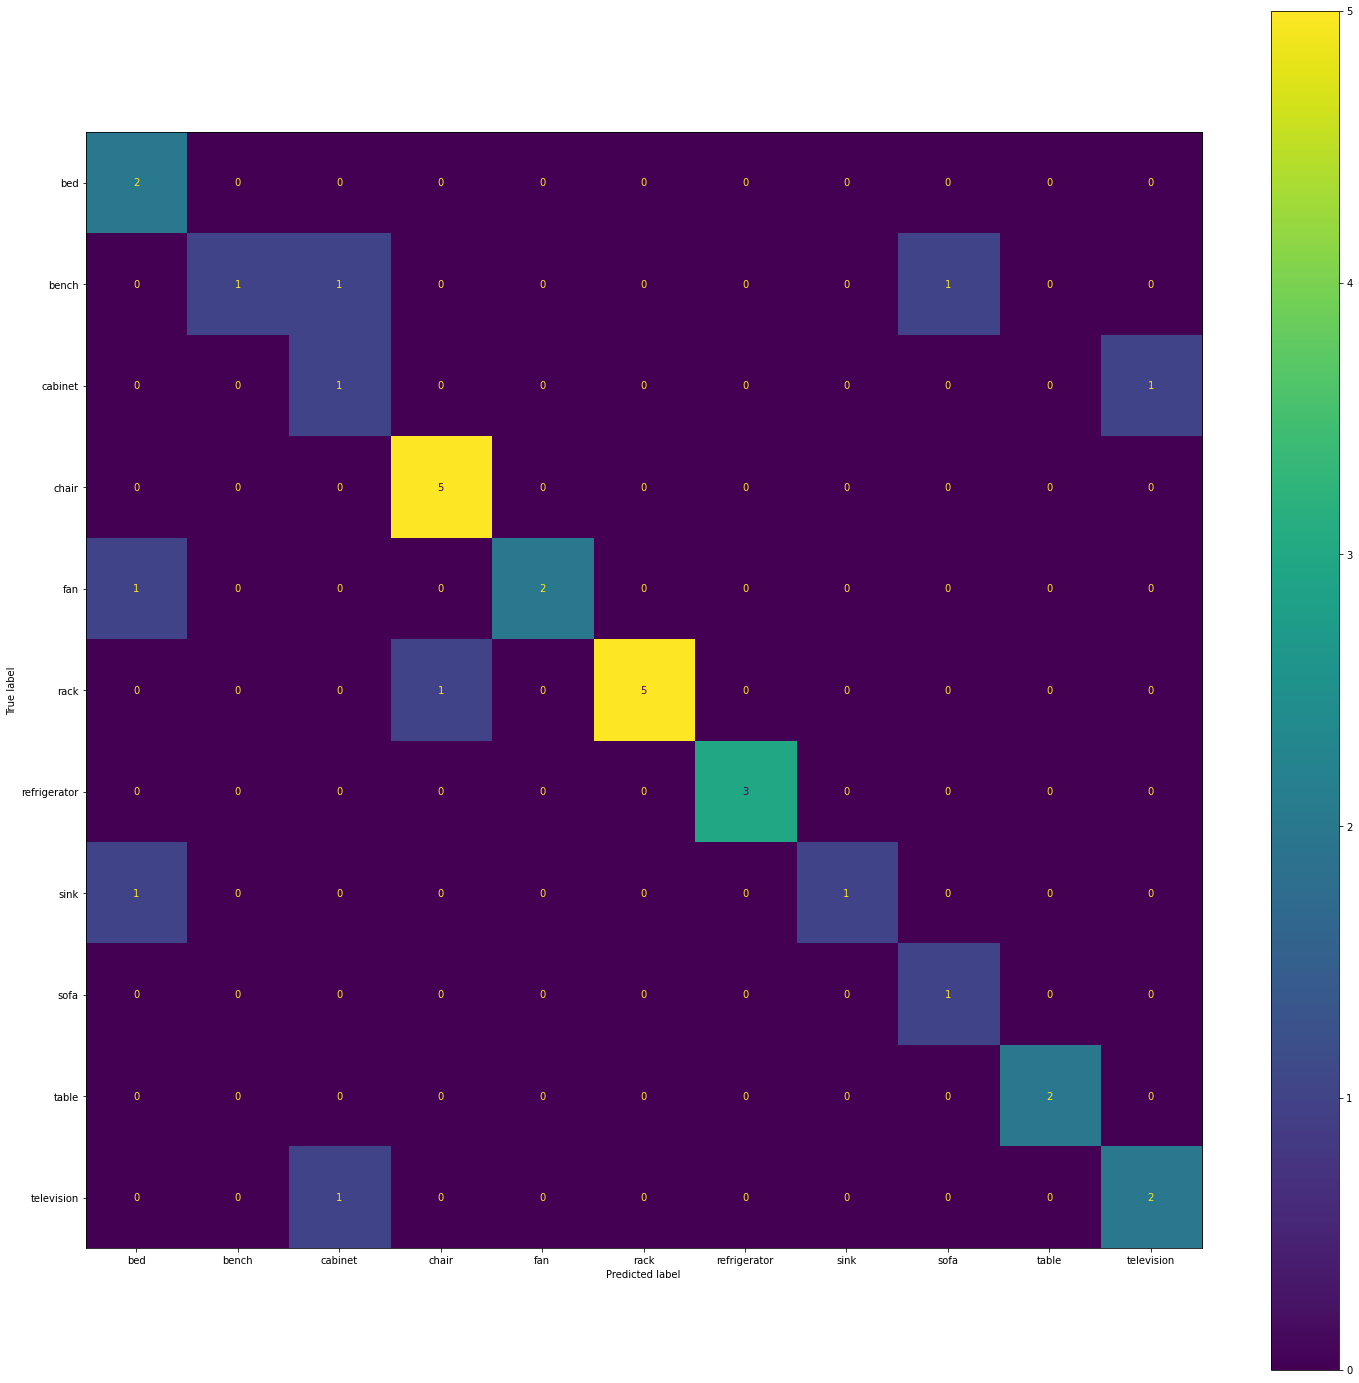

In [105]:
fig, ax = plt.subplots(figsize=(25, 25))
disp.plot(ax=ax)